In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix

In [2]:
Data = pd.read_csv('creditcard.csv')

In [3]:
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
Data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
Data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [6]:
Data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
Data.shape

(284807, 31)

In [9]:
Data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
y =  Data['Class']
X = Data.drop(['Class'], axis=1)

In [11]:
y.mean()

0.001727485630620034

In [12]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [13]:
X.isnull().mean()

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
dtype: float64

In [14]:
X.describe(percentiles=[0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99])

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
1%,2422.000000,-6.563199e+00,-4.960300e+00,-3.978377e+00,-3.122987e+00,-3.060396e+00,-2.124023e+00,-3.012847e+00,-4.033899e+00,-2.455288e+00,...,-1.568406e+00,-1.469679e+00,-1.654625e+00,-1.193417e+00,-1.657308e+00,-1.420859e+00,-1.009384e+00,-1.247746e+00,-8.762654e-01,0.120000
5%,25297.600000,-2.899147e+00,-1.971975e+00,-2.389740e+00,-2.195683e+00,-1.702021e+00,-1.406757e+00,-1.434423e+00,-8.421469e-01,-1.758426e+00,...,-5.584349e-01,-5.046735e-01,-1.081892e+00,-4.722464e-01,-1.143662e+00,-8.250264e-01,-6.973483e-01,-4.152460e-01,-3.178432e-01,0.920000
10%,35027.000000,-1.893272e+00,-1.359862e+00,-1.802587e+00,-1.656329e+00,-1.302171e+00,-1.167450e+00,-1.078148e+00,-4.589454e-01,-1.294047e+00,...,-3.896021e-01,-3.674467e-01,-8.674884e-01,-3.286342e-01,-8.703584e-01,-6.061010e-01,-5.480343e-01,-2.114656e-01,-1.556155e-01,1.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000


In [15]:
def outlier_cap(x):
    x= x.clip(lower = x.quantile(0.01))
    x= x.clip(upper = x.quantile(0.99))
    return(x)

In [16]:
X_all = X.apply(lambda x : outlier_cap(x))

In [17]:
X_all.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,2422.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,2422.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,2422.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,2422.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2422.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [18]:
X_all.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,...,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94816.385366,0.038150,0.022670,0.021939,-0.003695,0.007724,0.003972,0.004114,0.023047,-0.007435,...,0.004717,-0.006637,0.002335,0.003281,-0.000375,0.001425,-0.002176,0.002914,-0.000488,80.193138
std,47445.797516,1.712310,1.275830,1.370562,1.370351,1.129985,1.237162,0.909037,0.757350,1.037085,...,0.501794,0.416941,0.693255,0.347117,0.596501,0.493158,0.467454,0.274140,0.187417,159.284087
min,2422.000000,-6.563199,-4.960300,-3.978377,-3.122987,-3.060396,-2.124023,-3.012847,-4.033899,-2.455288,...,-1.568406,-1.469679,-1.654625,-1.193417,-1.657308,-1.420859,-1.009384,-1.247746,-0.876265,0.120000
25%,54201.500000,-0.920373,-0.598550,-0.890365,-0.848640,-0.691597,-0.768296,-0.554076,-0.208630,-0.643098,...,-0.211721,-0.228395,-0.542350,-0.161846,-0.354586,-0.317145,-0.326984,-0.070840,-0.052960,5.600000
50%,84692.000000,0.018109,0.065486,0.179846,-0.019847,-0.054336,-0.274187,0.040103,0.022358,-0.051429,...,-0.062481,-0.029450,0.006782,-0.011193,0.040976,0.016594,-0.052139,0.001342,0.011244,22.000000
75%,139320.500000,1.315642,0.803724,1.027196,0.743341,0.611926,0.398565,0.570436,0.327346,0.597139,...,0.133041,0.186377,0.528554,0.147642,0.439527,0.350716,0.240952,0.091045,0.078280,77.165000
max,170560.940000,2.237130,3.801811,2.728434,4.248032,3.424903,4.200085,2.696205,2.075973,2.986773,...,2.412190,1.931852,1.530152,1.508703,1.063748,1.203955,1.158698,0.931360,0.541126,1017.970000


In [19]:
from sklearn.preprocessing import KBinsDiscretizer
dicretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
X_binned = pd.DataFrame(dicretizer.fit_transform(X_all), index = X_all.index, columns= X_all.columns).add_suffix('_Rank')
X_binned.head()

,Time_Rank,V1_Rank,V2_Rank,V3_Rank,V4_Rank,V5_Rank,V6_Rank,V7_Rank,V8_Rank,V9_Rank,...,V20_Rank,V21_Rank,V22_Rank,V23_Rank,V24_Rank,V25_Rank,V26_Rank,V27_Rank,V28_Rank,Amount_Rank
0,0.0,1.0,4.0,9.0,8.0,3.0,7.0,6.0,5.0,6.0,...,8.0,5.0,6.0,3.0,5.0,5.0,3.0,7.0,3.0,8.0
1,0.0,6.0,5.0,4.0,6.0,5.0,5.0,4.0,5.0,4.0,...,4.0,2.0,2.0,6.0,2.0,6.0,6.0,4.0,5.0,1.0
2,0.0,1.0,1.0,9.0,6.0,3.0,9.0,8.0,7.0,0.0,...,9.0,8.0,8.0,9.0,1.0,2.0,4.0,2.0,2.0,9.0
3,0.0,2.0,3.0,9.0,2.0,5.0,8.0,6.0,7.0,0.0,...,2.0,3.0,4.0,2.0,0.0,9.0,3.0,6.0,7.0,8.0
4,0.0,1.0,7.0,8.0,6.0,3.0,6.0,7.0,1.0,8.0,...,8.0,5.0,8.0,2.0,5.0,3.0,8.0,8.0,9.0,7.0


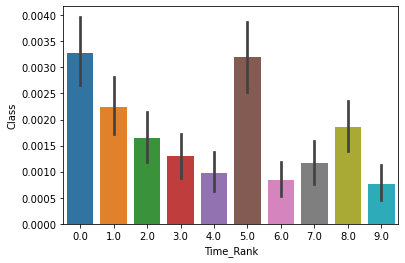

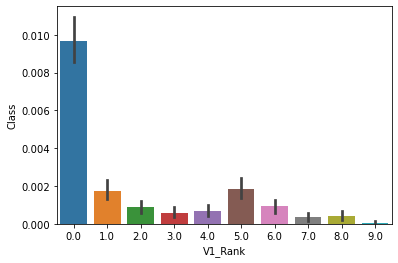

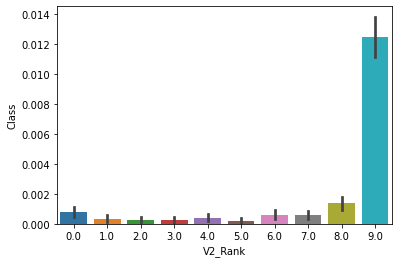

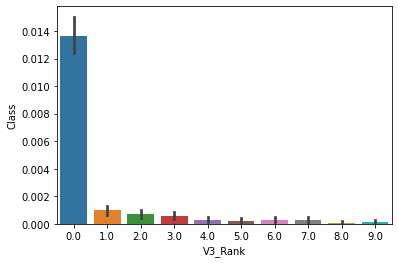

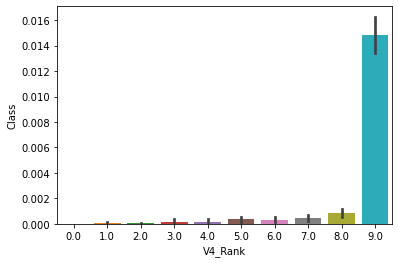

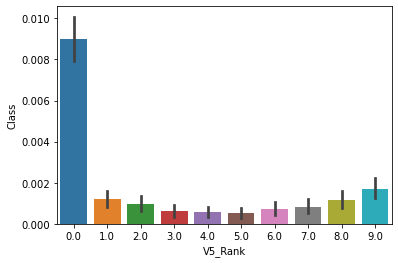

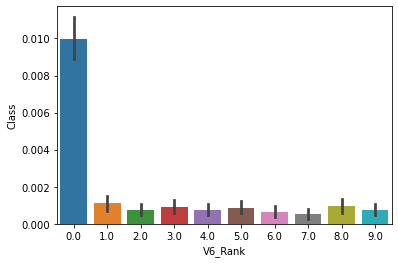

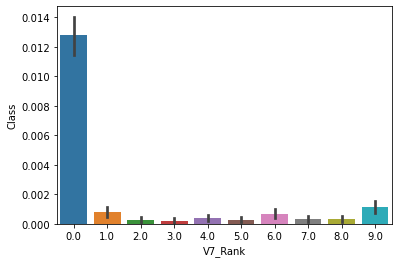

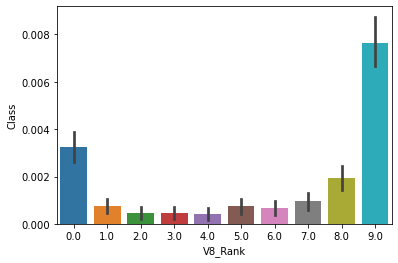

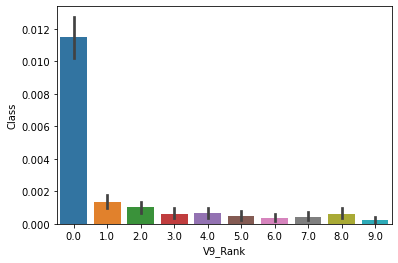

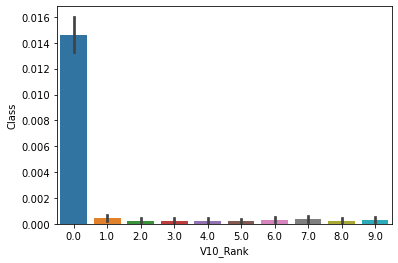

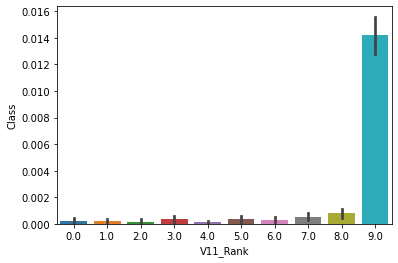

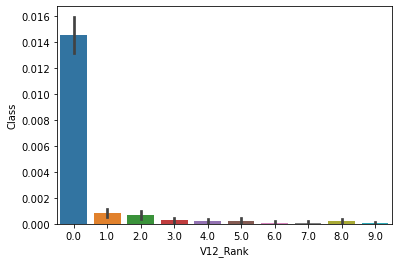

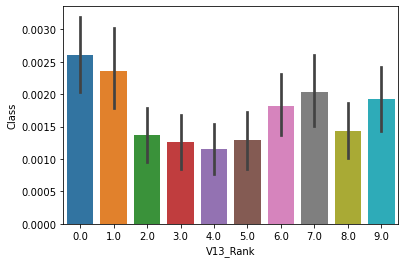

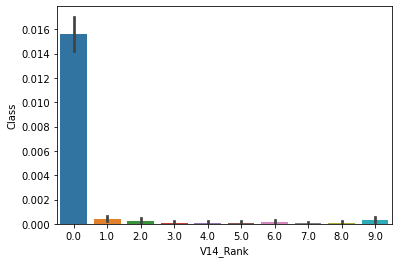

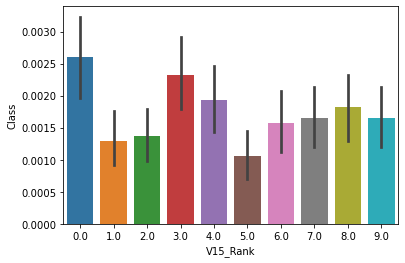

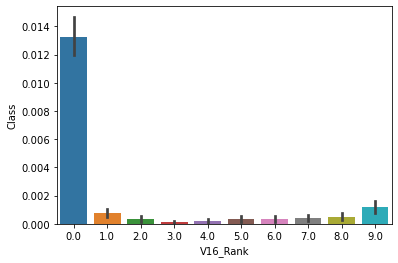

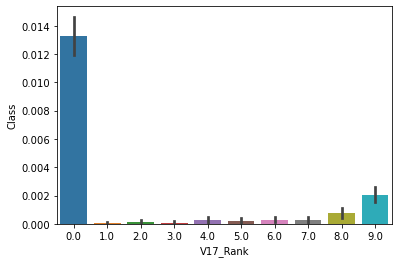

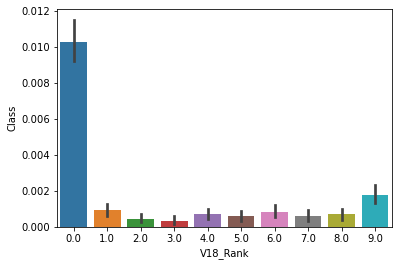

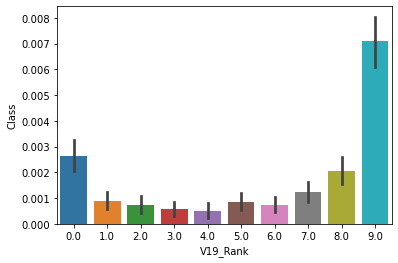

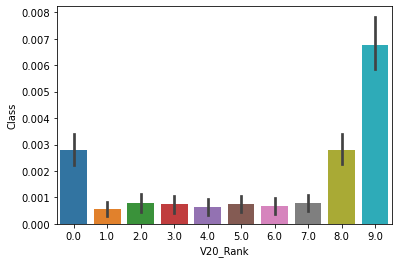

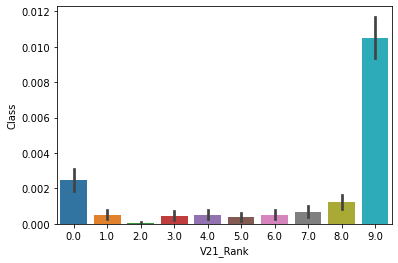

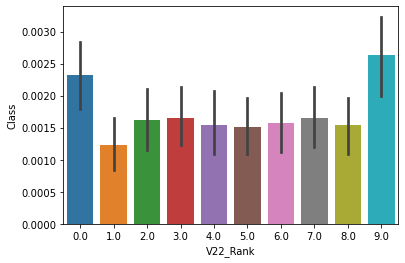

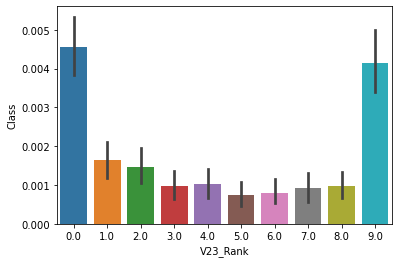

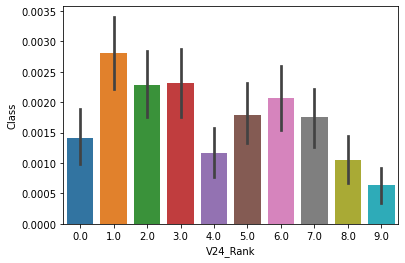

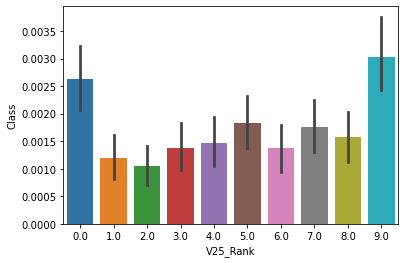

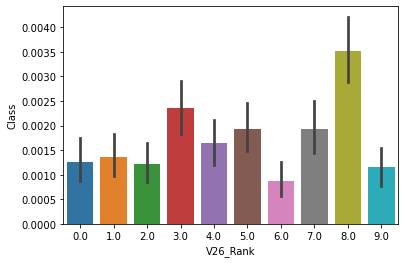

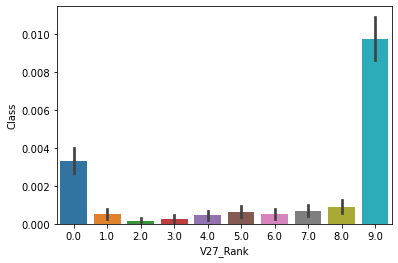

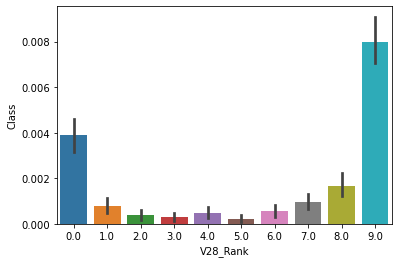

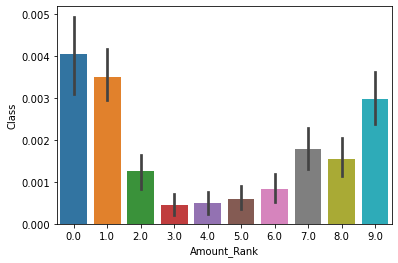

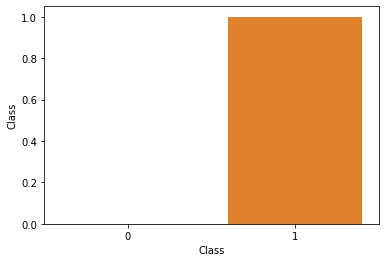

In [21]:
from numpy import mean
X_binned_combined = pd.concat([X_binned,y],axis=1, join = 'inner')
for col in (X_binned_combined):
    plt.figure()
    sns.barplot(x=col, y = 'Class', data=X_binned_combined, estimator=mean)
plt.show()

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_al = pd.DataFrame(scaler.fit_transform(X_all), index=X_all.index, columns=X_all.columns)
X_al

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,0.591272,0.557801,0.971359,0.610654,0.419730,0.408976,0.569700,0.676380,0.518016,...,0.457172,0.426682,0.606781,0.400775,0.633664,0.590289,0.378339,0.633886,0.603370,0.146878
1,0.0,0.881223,0.596483,0.618007,0.484484,0.481152,0.322838,0.513928,0.674155,0.404233,...,0.376658,0.365689,0.319003,0.479144,0.484173,0.605006,0.523633,0.568473,0.628612,0.002525
2,0.0,0.591438,0.413158,0.857574,0.475208,0.394307,0.620565,0.666364,0.700763,0.172845,...,0.525898,0.504972,0.761844,0.778215,0.355754,0.416493,0.401409,0.547194,0.576068,0.371902
3,0.0,0.635991,0.544968,0.860524,0.306565,0.470308,0.533075,0.569351,0.722001,0.196298,...,0.341750,0.400225,0.521198,0.371226,0.177039,0.787955,0.363204,0.601379,0.661584,0.121216
4,0.0,0.614178,0.666282,0.824102,0.478363,0.409110,0.351029,0.631591,0.615948,0.601432,...,0.496646,0.429291,0.770196,0.390789,0.660984,0.462832,0.697241,0.673289,0.770019,0.068645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,1.0,0.000000,1.000000,0.000000,0.143309,0.000000,0.000000,0.000000,1.000000,0.802952,...,0.764769,0.494816,0.554666,0.817098,0.421880,1.000000,0.580891,1.000000,1.000000,0.000639
284803,1.0,0.662522,0.559822,0.896612,0.323483,0.605774,0.503223,0.531993,0.708487,0.558628,...,0.408989,0.495037,0.809793,0.446272,0.235600,0.310207,0.283259,0.604018,0.580459,0.024237
284804,1.0,0.963914,0.531726,0.108656,0.348006,0.877509,0.815180,0.475739,0.776173,0.530634,...,0.394364,0.500282,0.701102,0.427781,0.844320,0.642561,0.425267,0.574640,0.599485,0.066572
284805,1.0,0.718469,0.626651,0.697930,0.517267,0.413618,0.434485,0.407540,0.771382,0.523216,...,0.426027,0.510042,0.770752,0.381226,0.654346,0.324480,0.717709,0.622533,0.691974,0.009707


In [23]:
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=25)
X_df = selector.fit_transform(X_al,y)
cols = selector.get_support(indices=True)
selected_features = X_al.iloc[:,cols]

In [24]:
selected_features.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V14       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V24       float64
V26       float64
V27       float64
V28       float64
Amount    float64
dtype: object

In [25]:
X_train, X_test, y_train, y_test = train_test_split(selected_features, y, test_size=0.25, random_state=46)

In [26]:
X_train['V10'].describe()

count    213605.000000
mean          0.389315
std           0.165351
min           0.000000
25%           0.291293
50%           0.374144
75%           0.476481
max           1.000000
Name: V10, dtype: float64

In [27]:
X_test['V10'].describe()

count    71202.000000
mean         0.388774
std          0.164929
min          0.000000
25%          0.291189
50%          0.373819
75%          0.475860
max          1.000000
Name: V10, dtype: float64

In [28]:
selected_features['V10'].describe()

count    284807.000000
mean          0.389180
std           0.165245
min           0.000000
25%           0.291276
50%           0.374045
75%           0.476329
max           1.000000
Name: V10, dtype: float64

In [29]:
y_train.describe()

count    213605.000000
mean          0.001709
std           0.041302
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

In [30]:
y_test.describe()

count    71202.000000
mean         0.001784
std          0.042196
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: Class, dtype: float64

In [31]:
y.describe()

count    284807.000000
mean          0.001727
std           0.041527
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Class, dtype: float64

## Logistic Regression model

In [35]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [36]:
coeff_df = pd.DataFrame(selected_features.columns)
coeff_df.columns = ['features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])
coeff_df

,features,Coefficient Estimate
0,Time,0.200695
1,V1,1.158159
2,V2,0.064981
3,V3,-0.557542
4,V4,4.074461
5,V5,0.653033
6,V6,-0.823366
7,V7,-2.084558
8,V8,-2.702238
9,V9,-1.044148


## Decision Tree model

In [38]:
dtree =  DecisionTreeClassifier(criterion='gini', random_state=0, max_depth=6,min_samples_split=55)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_split=55, random_state=0)

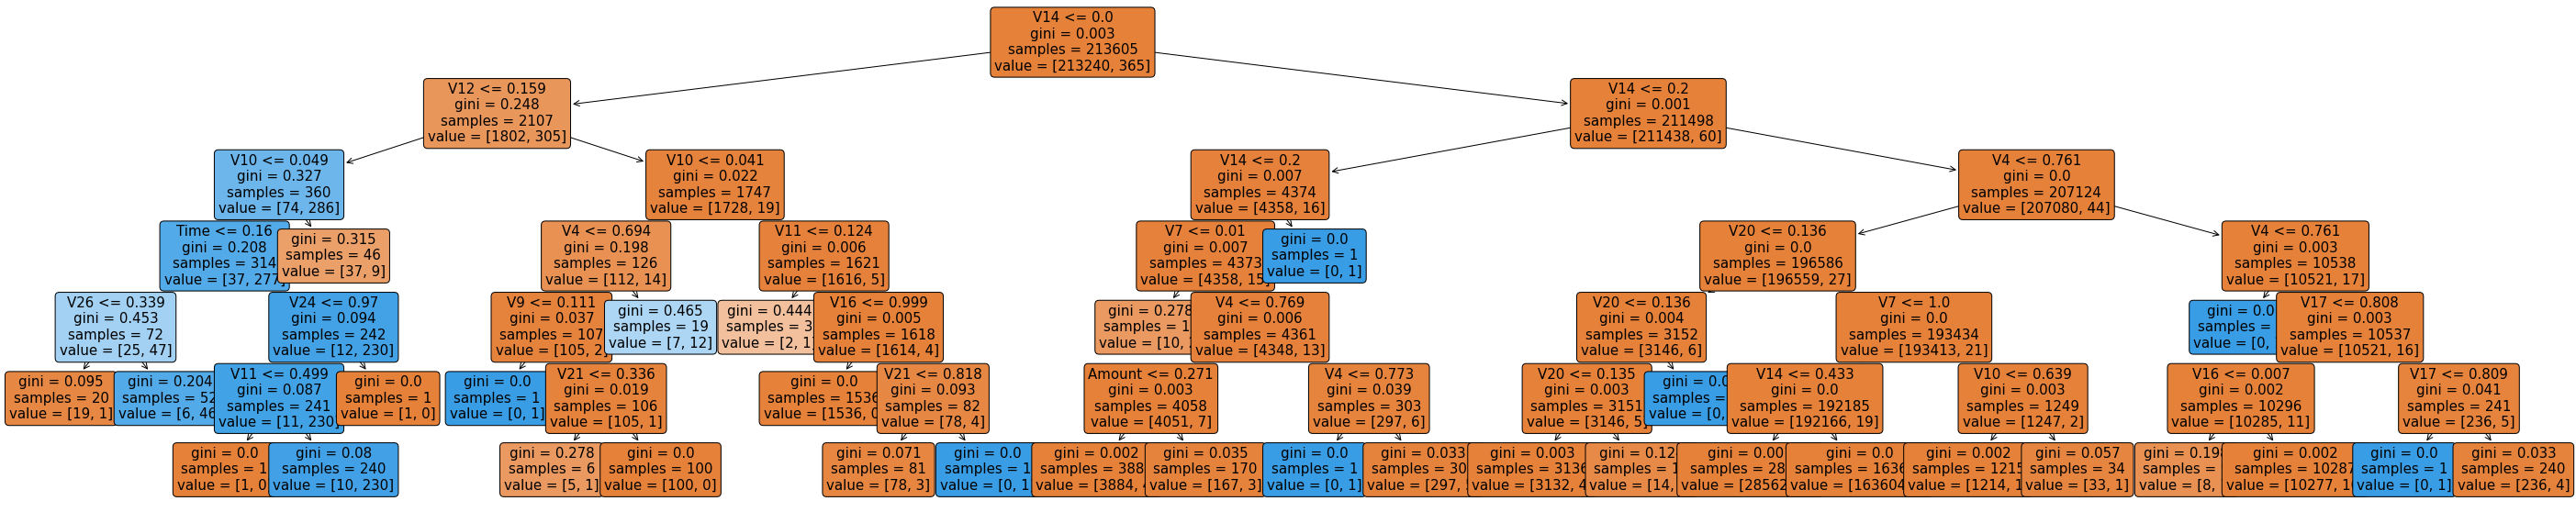

In [40]:
from sklearn import tree
import pydotplus
plt.figure(figsize=[50,10])
tree.plot_tree(dtree,filled=True,fontsize=15,rounded=True,feature_names=selected_features.columns)
plt.show()

In [41]:
rf = RandomForestClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_split=50, random_state=0)

In [42]:
import pandas as pd
feature_importances=pd.DataFrame(rf.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
V10,0.178652
V12,0.141157
V14,0.108633
V11,0.086017
V7,0.083796
V16,0.073069
V17,0.070767
V4,0.058465
V3,0.039739
V9,0.030876


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(criterion='mse', random_state=0,max_depth=6,min_samples_split=50)
gb.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=6, min_samples_split=50,
                           random_state=0)

In [44]:
feature_importances=pd.DataFrame(gb.feature_importances_,
                                 index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
V7,0.405849
V5,0.228909
V28,0.105419
V14,0.050795
V26,0.042058
Time,0.036549
V19,0.030035
V12,0.018372
V17,0.018208
V3,0.013117


In [45]:
y_pred_tree = dtree.predict(X_test)
y_pred_lr = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [47]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.9993399061824106
Precision 0.8448275862068966
Recall 0.7716535433070866
f1_score 0.8065843621399178


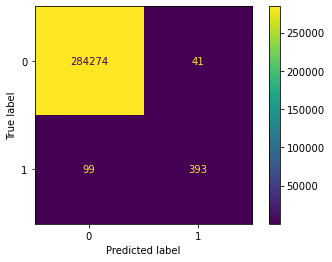

In [53]:
metrics.plot_confusion_matrix(dtree,selected_features,y)

In [48]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision",metrics.precision_score(y_test,y_pred_lr))
print("Recall",metrics.recall_score(y_test,y_pred_lr))
print("f1_score",metrics.f1_score(y_test,y_pred_lr))

Accuracy: 0.9993539507317211
Precision 0.8292682926829268
Recall 0.8031496062992126
f1_score 0.816


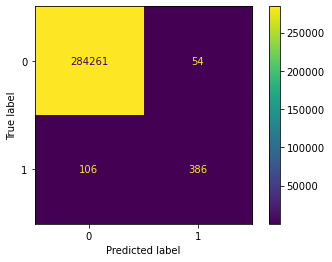

In [52]:
metrics.plot_confusion_matrix(logreg,selected_features,y)

In [49]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9993258616331002
Precision 0.8495575221238938
Recall 0.7559055118110236
f1_score 0.8


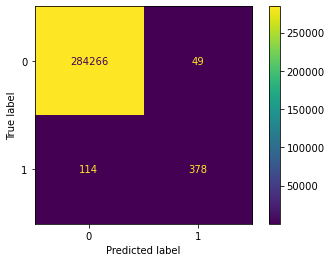

In [54]:
metrics.plot_confusion_matrix(rf,selected_features,y)

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gb))
print("Precision",metrics.precision_score(y_test,y_pred_gb))
print("Recall",metrics.recall_score(y_test,y_pred_gb))
print("f1_score",metrics.f1_score(y_test,y_pred_gb))

Accuracy: 0.9975000702227466
Precision 0.3876651982378855
Recall 0.6929133858267716
f1_score 0.49717514124293793


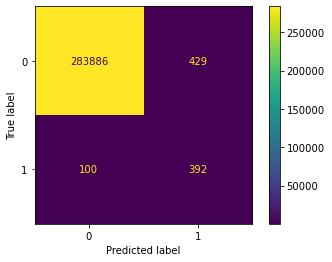

In [55]:
metrics.plot_confusion_matrix(gb,selected_features,y)